<a href="https://colab.research.google.com/github/fbrandao2k/AI-ComputerVision/blob/main/YOLO_v4_Detec%C3%A7%C3%A3o_de_objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [ ]:
import cv2
print(cv2.__version__)

4.8.0


In [ ]:
#!pip install opencv-python==4.4.0.40

In [ ]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.8.0


## Etapa 2 - Conectando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [ ]:
path = '/content/gdrive/My Drive/Cursos\ -\ recursos/YOLO/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [ ]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
len(LABELS)

80

In [ ]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [ ]:
net = cv2.dnn.readNet(config_path, weights_path)

In [ ]:
net

<dnn_Net 0x7f2935c69410>

## Etapa 4 - Definindo mais configurações para a detecção

In [ ]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[ 82 242 156]
 [ 46  22  47]
 [ 77 206 216]
 [ 92  33 200]
 [ 16 123 233]
 [ 85  70 122]
 [136  73 229]
 [ 81 226  66]
 [ 80  12 197]
 [242 127 111]
 [ 62 214 134]
 [202 216   1]
 [185  44 242]
 [165  27 232]
 [ 33  61 252]
 [236  32  61]
 [158  87 237]
 [ 23  29  42]
 [ 94 254 224]
 [ 60   2 164]
 [  3 174  60]
 [119 224 143]
 [ 67 252  47]
 [ 73 139 215]
 [ 44 193  19]
 [162 127 252]
 [167 162 110]
 [137 216  95]
 [134 118  46]
 [200 237  86]
 [ 37  50 237]
 [ 68  90 237]
 [145  94  20]
 [188 141 238]
 [161 177 139]
 [ 60 110  99]
 [ 99 249 132]
 [252 127 227]
 [ 59  95 117]
 [170 105 231]
 [136  15  98]
 [107 254 224]
 [212 106 225]
 [110 200 111]
 [241 116 140]
 [103  91 140]
 [158  28 117]
 [154 212  73]
 [ 17 125 240]
 [ 68 141   3]
 [244 183   4]
 [ 27 121 150]
 [241 159 163]
 [ 19  53 207]
 [104 128   3]
 [133  98 114]
 [171 166 178]
 [111 118 135]
 [125 108 149]
 [179 232  80]
 [ 47 206  64]
 [250 200 248]
 [148  19  75]
 [200 217 117]
 [ 59 115 162]
 [100 198 146]
 [146 127 

In [ ]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
['conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [ ]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[[327]
 [353]
 [379]]


**`[ ! ] Atenção:`** se estiver executando na versão 3.10 do Python (ou superior) troque `ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]` por:
> `ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]`

No segundo semestre de 2023, o Colab passou a atribuir automaticamente o Python 3.10 às sessões, portanto deixaremos assim

In [ ]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

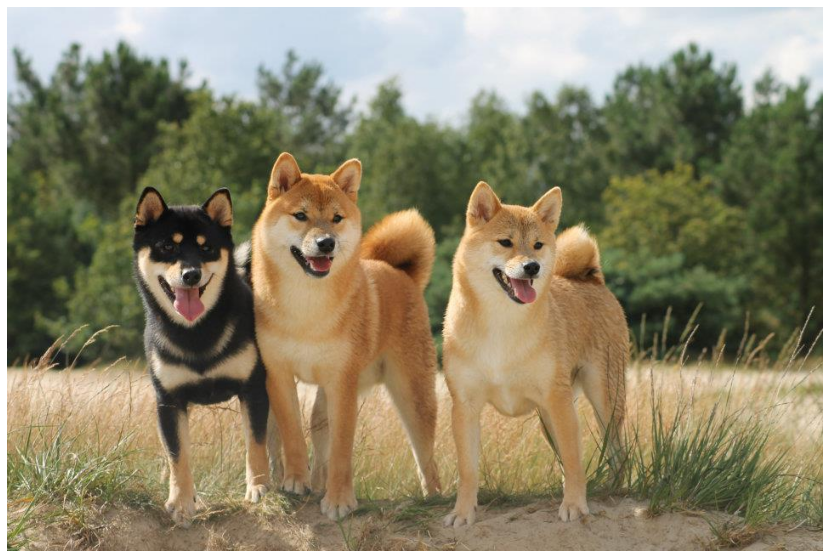

In [ ]:
imagem = cv2.imread('/content/gdrive/My Drive/Cursos - recursos/YOLO/imagens/cachorros.jpg')
mostrar(imagem)

In [ ]:
type(imagem)

numpy.ndarray

In [ ]:
print(imagem)

[[[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [231 228 223]
  [231 228 223]
  [231 228 223]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [232 229 224]
  [232 229 224]
  [232 229 224]]

 ...

 [[104 138 131]
  [ 80 114 107]
  [ 69 106  98]
  ...
  [111 132 147]
  [105 126 141]
  [ 89 110 125]]

 [[114 148 141]
  [117 151 144]
  [108 145 135]
  ...
  [124 147 163]
  [125 148 164]
  [123 146 162]]

 [[ 49  83  76]
  [ 67 102  92]
  [ 67 104  94]
  ...
  [ 73  96 112]
  [ 68  91 107]
  [ 73  96 112]]]


In [ ]:
imagem_cp = imagem.copy()

In [ ]:
imagem.shape

(640, 960, 3)

In [ ]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


## Etapa 6 - Processando a imagem de entrada

In [ ]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 2.26 segundos


## Etapa 7 - Definindo as variáveis

In [ ]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

## Etapa 8 - Realizando a predição

In [ ]:
len(layer_outputs)

3

In [ ]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.0110055 , 0.01021747, 0.02264759, ..., 0.        , 0.        ,
         0.        ],
        [0.01492388, 0.01543289, 0.03303423, ..., 0.        , 0.        ,
         0.        ],
        [0.01701082, 0.01489798, 0.05110354, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.98426443, 0.03099855, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.985908  , 0.05975068, ..., 0.        , 0.        ,
         0.        ]], dtype=float32), 8112)

In [ ]:
layer_outputs[1]

array([[0.03031933, 0.03208476, 0.10433296, ..., 0.        , 0.        ,
        0.        ],
       [0.03298577, 0.03253514, 0.13059245, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151366, 0.15157257, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866273, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513652, ..., 0.        , 0.        ,
        0.        ],
       [0.96610314, 0.9677124 , 0.10772247, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.0640237 , 0.06951442, 0.15857814, ..., 0.        , 0.        ,
         0.        ],
        [0.06164717, 0.05672135, 0.31426722, ..., 0.        , 0.        ,
         0.        ],
        [0.03240779, 0.05009161, 0.7458891 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.20663446, ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.29772264, ..., 0.        , 0.        ,
         0.        ],
        [0.95123345, 0.95295554, 0.52080923, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.4023696e-02, 6.9514424e-02, 1.5857814e-01, 3.4840125e-01,
        4.2169032e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [ ]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
LABELS[16]

'dog'

In [ ]:
np.argmax(np.array([0.10, 0.80, 0.10]))

1

In [ ]:
teste = np.array([0.10, 0.80, 0.10])

In [ ]:
teste[1]

0.8

In [ ]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.605953 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.      ]
classe mais provável: 16
confiança: 0.605953
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570455 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.   

In [ ]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [ ]:
print(confiancas), len(confiancas)

[0.6059529781341553, 0.9570454955101013, 0.88912433385849, 0.9090498089790344, 0.9525655508041382, 0.7894678115844727, 0.9860403537750244, 0.9869317412376404, 0.6623730659484863, 0.6959574222564697, 0.9729036688804626, 0.9767158627510071, 0.8875227570533752, 0.897688627243042, 0.9810121655464172, 0.9824252128601074]


(None, 16)

In [ ]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [ ]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [ ]:
objs

array([[ 7],
       [15],
       [11]], dtype=int32)

In [ ]:
print(objs.flatten())

[ 7 15 11]


In [ ]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824252128601074, 0.9767158627510071)

In [ ]:
confiancas[0]

0.6059529781341553

## Etapa 10 - Mostrando o resultado da detecção na imagem

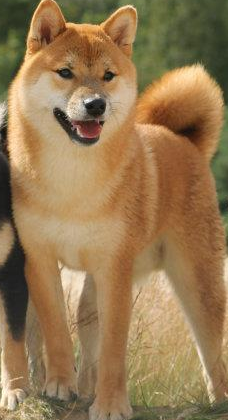

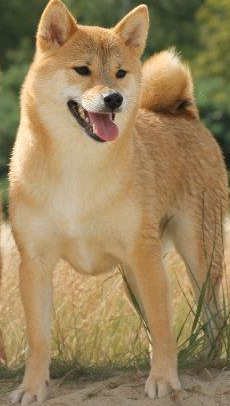

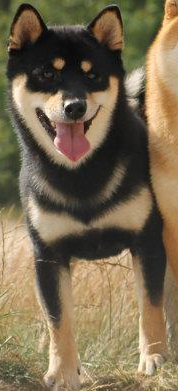

In [ ]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

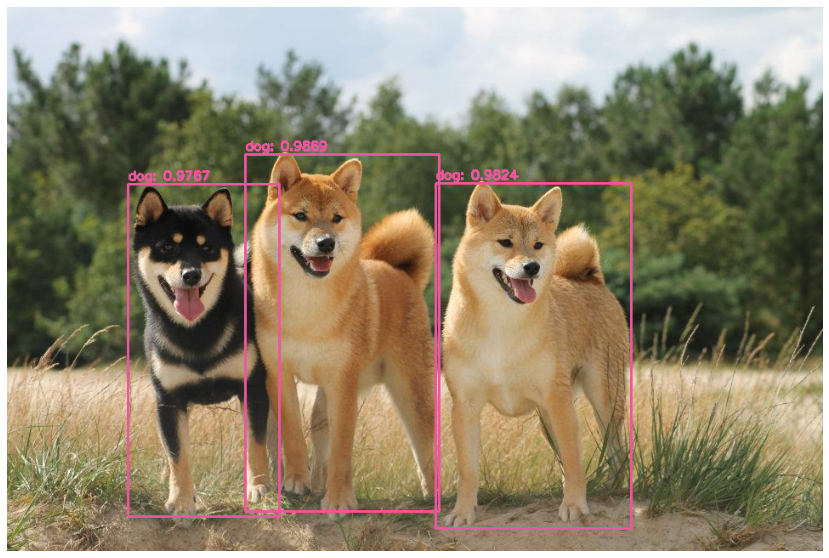

In [ ]:
mostrar(imagem)

In [ ]:
cv2.imwrite('resultado.jpg', imagem)

True

In [ ]:
!cp ./resultado.jpg /content/gdrive/My\ Drive/Cursos\ -\ recursos/YOLO/imagens/resultado_cachorro.jpg